In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime as dt
from dateutil.relativedelta import relativedelta

In [2]:
# Define the list of tickers and weights, and number of years to look back
tickers = ['AAPL', 'AMZN', 'GOOG', 'MSFT']
weights = [0.4, 0.3, 0.2, 0.1]
years = 3


end_date = dt.date.today()
start_date = end_date - relativedelta(years=years)

# Download the closing prices for the tickers
prices = pd.DataFrame()
for ticker in tickers:
    ticker_data = yf.download(ticker, period=f"{years}y", interval="1d")['Close']
    prices[ticker] = ticker_data

# Combine the prices into a portfolio series
portfolio = pd.DataFrame()
portfolio['Portfolio'] = (prices * weights).sum(axis=1)
prices['Portfolio']=portfolio['Portfolio']

days = [i for i in range(1, len(portfolio['Portfolio'])+1)]
hist_prices = portfolio['Portfolio'].tolist()

ending_price = []
is_profitable = []

#model variables
log_returns = np.log(1 + portfolio.pct_change())
mean = log_returns.mean()
var = log_returns.var()
drift = mean - (var * 0.5)
std_dev = log_returns.std()
sim_days = 63 #about 3 months of trading days
iterations = 20


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Average simulated ending price: $346.47
Average percent increase: 101.78%
Percent of simulated ending prices > current day price: 115.0%


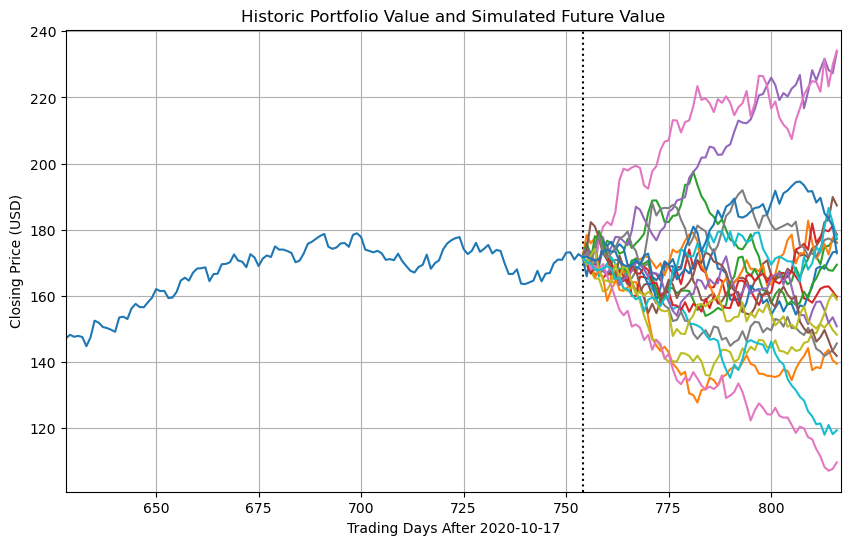

In [4]:
#create plot of historic values
fig = plt.figure(figsize=[10, 6])
plt.plot(days, hist_prices)
plt.title(f"Historic Portfolio Value and Simulated Future Value")
plt.xlabel("Trading Days After " + str(start_date))
plt.ylabel("Closing Price (USD)")
plt.axvline(x=days[-1], label="Current Date", color='black', ls=':')
plt.xlim([len(days)-(sim_days*2), len(days)+sim_days])
plt.grid()

#generate simulated values and plot them
for i in range(iterations):
    day_num = np.arange(days[-1],days[-1]+sim_days)
    sim_returns = np.exp(drift.values + std_dev.values * norm.ppf(np.random.rand(sim_days)))
    S0 = portfolio['Portfolio'].iloc[-1]
    sim_prices = np.zeros_like(sim_returns)
    sim_prices[0] = S0
    for t in range(1, sim_days):
        sim_prices[t] = sim_prices[t - 1] * sim_returns[t]
    plt.plot(day_num, sim_prices)
    ending_price.append(sim_prices[-1])
    if sim_prices[-1] > S0:
        is_profitable.append(1)
    else:
        is_profitable.append(0)

#show some summary statistics 
pct_profit = round(100 * (sum(is_profitable) / iterations), 2)
avg_ending = round(sum(ending_price)/iterations, 2)
avg_pct_change = round(100 * ((avg_ending - S0) / S0), 2)
print(f'Average simulated ending price: ${avg_ending}')
print(f'Average percent increase: {avg_pct_change}%')
print(f'Percent of simulated ending prices > current day price: {pct_profit}%')
    

Average simulated ending price: $345.53
Average percent increase: 108.17%
Percent of simulated ending prices > current day price: 110.0%
